## Data Cleaning and merging dataframes

In this notebook, we'll work with `movie_basic`s and `movie_ratings` tables from `'im.db'`. As well as `'tn.movie_budget.csv'`.

Before we can get going, we'll need to import the relevant packages and conncet to the database.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('im.db')

In this notebook we'll focus on the `movie_basics` and `movie_ratings`.

## Compared to the Individual Tables:

### `movie_basics` Table:

In [3]:
q = """
SELECT
    movie_id, 
    primary_title,
    original_title,
    start_year,
    runtime_minutes,
    genres
FROM movie_basics
"""
pd.read_sql(q, conn).head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### `movie_ratings` Table:

In [4]:
q = """
SELECT
    movie_id,
    averagerating,
    numvotes
FROM movie_ratings
"""
pd.read_sql(q, conn).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
# 

In [6]:
q = """
SELECT
    movie_id, 
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
"""
df = pd.read_sql(q, conn)
df.shape

(73856, 5)

In [7]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [8]:
# Count null values
df.isna().sum()

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

In [9]:
# Since the genre is a categorical data and the missing values accounts for 
# only 1 % (800/73856) of our total data we decided to drop rows that 
# contained null values
df_nonull_genres = df.dropna(axis = 0)

In [10]:
# Count null values
df_nonull_genres.isna().sum()

movie_id         0
primary_title    0
genres           0
averagerating    0
numvotes         0
dtype: int64

# tn.movie_budgets.csv

In [11]:
movie_budget = pd.read_csv('tn.movie_budgets.csv')
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# 
df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)

C:\Users\jormai\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
#
df_nonull_genres.columns

Index(['movie_id', 'movie', 'genres', 'averagerating', 'numvotes'], dtype='object')

In [15]:
im_movie_budget = pd.merge(df_nonull_genres ,movie_budget, on='movie', how='left', indicator = 'im_and_movie_budget')

In [16]:
im_movie_budget['im_and_movie_budget'].value_counts()

left_only     70307
both           2867
right_only        0
Name: im_and_movie_budget, dtype: int64

In [17]:
cleaned_df = im_movie_budget[im_movie_budget['im_and_movie_budget'] == 'both'] 
cleaned_df

,movie_id,movie,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,im_and_movie_budget
16,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,26.0,"Dec 31, 2012","$45,000,000",$0,"$73,706",both
36,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,17.0,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",both
42,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,37.0,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",both
46,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,67.0,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",both
47,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,34.0,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",both
...,...,...,...,...,...,...,...,...,...,...,...
72971,tt9746500,Earth,Documentary,7.3,49,36.0,"Apr 22, 2009","$47,000,000","$32,011,576","$116,773,317",both
73096,tt9851050,Sisters,"Action,Drama",4.7,14,57.0,"Dec 18, 2015","$30,000,000","$87,044,645","$106,030,660",both
73111,tt9861522,Ali,Drama,7.7,79,45.0,"Dec 25, 2001","$109,000,000","$58,183,966","$87,683,966",both
73151,tt9899880,Columbus,Comedy,5.8,5,93.0,"Aug 4, 2017","$700,000","$1,017,107","$1,110,511",both


In [18]:
# 
cleaned_df.isna().sum()

movie_id               0
movie                  0
genres                 0
averagerating          0
numvotes               0
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
im_and_movie_budget    0
dtype: int64

In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 16 to 73164
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   movie_id             2867 non-null   object  
 1   movie                2867 non-null   object  
 2   genres               2867 non-null   object  
 3   averagerating        2867 non-null   float64 
 4   numvotes             2867 non-null   int64   
 5   id                   2867 non-null   float64 
 6   release_date         2867 non-null   object  
 7   production_budget    2867 non-null   object  
 8   domestic_gross       2867 non-null   object  
 9   worldwide_gross      2867 non-null   object  
 10  im_and_movie_budget  2867 non-null   category
dtypes: category(1), float64(2), int64(1), object(7)
memory usage: 249.3+ KB


# Business Case #2: Release date(month/season/holiday): and their corresponding popularity/profits

In [20]:
#1: Organize release_date by seasons () / month() /holiday***
#2: Count() of movies produced at each season
#3: Graph Release data using histogram/bar
#4: Count() profit of each seasons
#5 Graph
#6 Analyze correlation between season vs profit
#7: Count() ppopulartiy of each seasons
#8 Graph
#9 Analyze correlation between season vs popularity
#10 Find correlation between seasons vs popularity vs profit 
#11 Recommendations

In [28]:
#Count total movies in each season
seasons= {'Spring': ['Mar','Apr','May'], 'Summer': ['Jun','Jul','Aug',], 'Fall': ['Sep','Oct','Nov'], 'Winter': ['Dec','Jan','Feb']}

cleaned_df['release_date']

season_dict = {'Spring':0,'Summer':0,'Fall':0,'Winter':0,}

#function to return season
def get_season(x):
    for key,val in seasons.items():
        if x[0] in val:
            return key


def season_count():
    for i in cleaned_df['release_date']:
        x = i.split(' ')
        key = get_season(x)
        season_dict[key]+=1
    return season_dict
    
season_count()


{'Spring': 673, 'Summer': 682, 'Fall': 751, 'Winter': 761}

Text(0.5, 1.0, 'Distribution of Movies by Season')

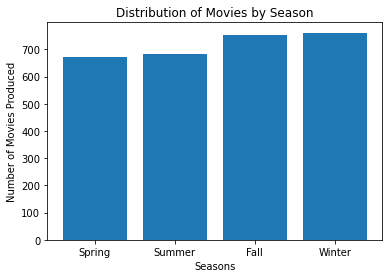

In [29]:
#Bar Chart
fig, ax = plt.subplots()

ax.bar(season_dict.keys(),season_dict.values())
ax.set_xlabel('Seasons')
ax.set_ylabel('Number of Movies Produced')
ax.set_title('Distribution of Movies by Season')

In [30]:
#Count of Popularity between each season

cleaned_df['numvotes']

popularity_dict={'Spring':0,'Summer':0,'Fall':0,'Winter':0,}

length = cleaned_df.shape[0]

def popularity_count():
    for i in cleaned_df.itertuples():
        numvote= i[5]
        x=i[7].split(' ')
        y=get_season(x)
        popularity_dict[y]+=numvote
    return popularity_dict

popularity_count()

{'Spring': 46994534, 'Summer': 50685780, 'Fall': 53826543, 'Winter': 39049091}

Text(0.5, 1.0, 'Distribution of Votecount by Season')

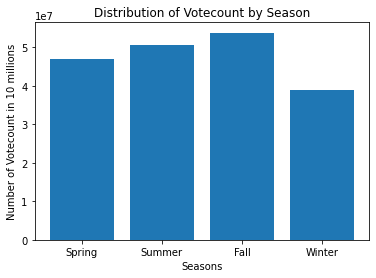

In [31]:
#Bar Chart

fig, ax = plt.subplots()

ax.bar(popularity_dict.keys(),popularity_dict.values())
ax.set_xlabel('Seasons')
ax.set_ylabel('Number of Votecount in 10 millions')
ax.set_title('Distribution of Votecount by Season')



Text(0.5, 1.0, 'Number of Votes vs. Month of Movie Release')

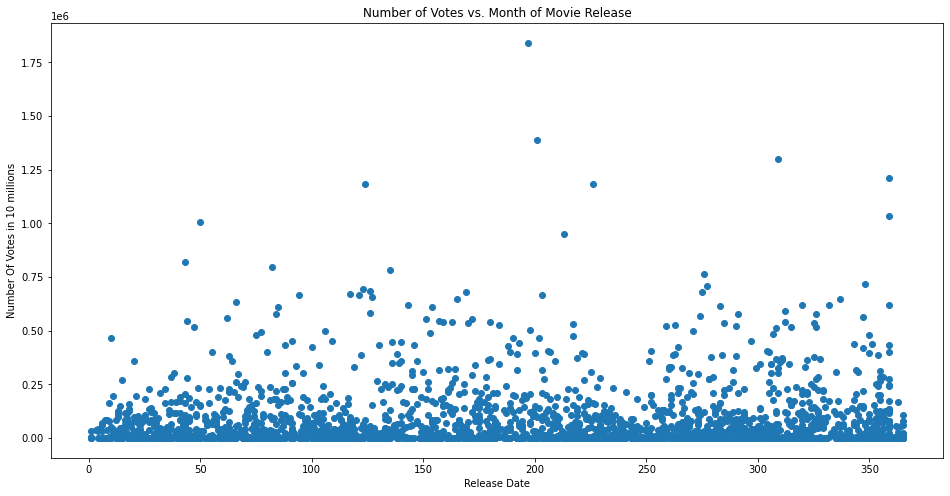

In [108]:
#correlation between release date vs. numvotes
import calendar
from datetime import datetime
fig, ax = plt.subplots(figsize=(16, 8))

month_list=[]
month_value = {'Jan':1,'Feb':32,'Mar': 60,'Apr':91, 'May':121, 'Jun':152, 'Jul':182, 'Aug':213,'Sep':244,"Oct":274,'Nov':305,'Dec':335}
#month_value = {name: num for num, name in enumerate(calendar.month_abbr) if num}

for i in cleaned_df['release_date']:
        x = i.split(' ')
        val = month_value[x[0]]
        y = x[1].strip(',')
        month_list.append(val + int(y) - 1) 

label = [30,60,90,120,150,180,210,240,270,300,330,360]
        
ax.scatter(month_list,cleaned_df['numvotes'])
ax.set_xlabel('Release Date')
ax.set_ylabel('Number Of Votes in 10 millions')
ax.set_title('Number of Votes vs. Month of Movie Release')



,movie_id,movie,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,im_and_movie_budget
16,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,26.0,"Dec 31, 2012","$45,000,000",$0,"$73,706",both
36,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,17.0,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",both
42,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,37.0,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",both
46,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,67.0,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",both
47,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,34.0,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",both
...,...,...,...,...,...,...,...,...,...,...,...
72971,tt9746500,Earth,Documentary,7.3,49,36.0,"Apr 22, 2009","$47,000,000","$32,011,576","$116,773,317",both
73096,tt9851050,Sisters,"Action,Drama",4.7,14,57.0,"Dec 18, 2015","$30,000,000","$87,044,645","$106,030,660",both
73111,tt9861522,Ali,Drama,7.7,79,45.0,"Dec 25, 2001","$109,000,000","$58,183,966","$87,683,966",both
73151,tt9899880,Columbus,Comedy,5.8,5,93.0,"Aug 4, 2017","$700,000","$1,017,107","$1,110,511",both
